In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


# Sales Data Analysis Project

This project performs an **exploratory data analysis (EDA)** on a fictional sales dataset to uncover key insights related to product performance, customer behavior, and revenue trends over multiple years. The analysis covers:

- Sales distribution by **product lines, deal sizes, countries, and cities**.

- **Yearly and monthly sales trends**, including detailed comparisons between 2003, 2004, and 2005.

- Identification of **top customers, regions, and seasonal sales patterns**.

- **Visualization of data** to support decision-making and strategic planning.

- The goal is to provide a clear **understanding of sales dynamics** and opportunities for growth.

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv("/kaggle/input/sample-sales-data/sales_data_sample.csv", encoding= "latin1")

In [134]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [135]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [136]:
df.loc[0]

ORDERNUMBER                           10107
QUANTITYORDERED                          30
PRICEEACH                              95.7
ORDERLINENUMBER                           2
SALES                                2871.0
ORDERDATE                    2/24/2003 0:00
STATUS                              Shipped
QTR_ID                                    1
MONTH_ID                                  2
YEAR_ID                                2003
PRODUCTLINE                     Motorcycles
MSRP                                     95
PRODUCTCODE                        S10_1678
CUSTOMERNAME              Land of Toys Inc.
PHONE                            2125557818
ADDRESSLINE1        897 Long Airport Avenue
ADDRESSLINE2                            NaN
CITY                                    NYC
STATE                                    NY
POSTALCODE                            10022
COUNTRY                                 USA
TERRITORY                               NaN
CONTACTLASTNAME                 

**Updated Dataframe**

In [137]:
df= df[['QUANTITYORDERED','SALES','MONTH_ID','YEAR_ID','PRODUCTLINE', 'CUSTOMERNAME','CITY','COUNTRY','DEALSIZE']]

In [138]:
df.columns

Index(['QUANTITYORDERED', 'SALES', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'CUSTOMERNAME', 'CITY', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

**TOTAL REVENUE:**

In [139]:
total_revenue= df['SALES'].sum()
print(total_revenue)

10032628.85


**SALES BY PRODUCTS:**

In [140]:
sales_by_product=df.groupby("PRODUCTLINE")["SALES"].sum().reset_index()
print(sales_by_product)

        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
1       Motorcycles  1166388.34
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47
5  Trucks and Buses  1127789.84
6      Vintage Cars  1903150.84


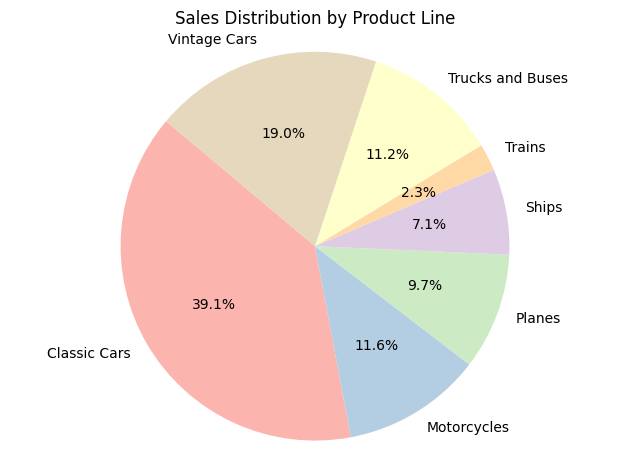

In [141]:
plt.pie(
    sales_by_product["SALES"],
    labels=sales_by_product["PRODUCTLINE"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title("Sales Distribution by Product Line")
plt.axis('equal')  # Make pie a perfect circle
plt.tight_layout()
plt.show()

### Sales by Product Line

This pie chart visualizes how total sales are distributed across different product lines.  
Key Insight: The most dominant category is Classic Cars, $39,19,615. Whereas Trains is the minimum selling category, $2,26,243.


**YEARLY SALES**

In [142]:
yearly_sales= df.groupby('YEAR_ID')['SALES'].sum().reset_index()
print(yearly_sales)

   YEAR_ID       SALES
0     2003  3516979.54
1     2004  4724162.60
2     2005  1791486.71


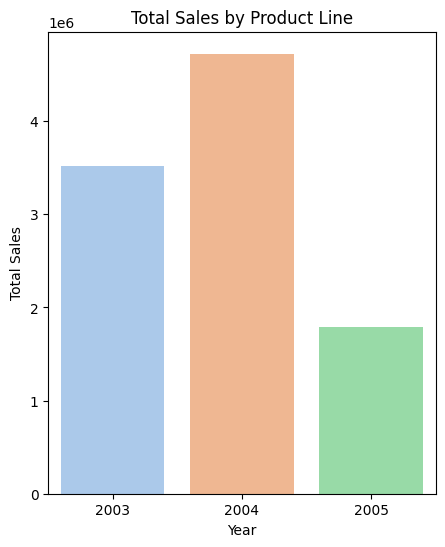

In [143]:
plt.figure(figsize=(5,6))
sns.barplot(y="SALES", x="YEAR_ID", data=yearly_sales.sort_values(by="SALES", ascending=False), palette="pastel")

plt.title("Total Sales by Product Line")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.show()

### Yearly Comparison Insight

When comparing monthly sales trends from 2003, 2004, and 2005:

- **2004** clearly outperformed the other two years in overall sales, $35,16,979. 
- **2005** experienced a drop in mid-year months and had the lowest overall sales among the three.

**Insight:** 2004 could be considered the best-performing year in terms of sales, likely due to strong performance — possibly driven by successful campaigns, new product launches, or favorable market conditions.


In [144]:
import statistics

**MONTHLY SALES AVERAGE OVER 3 YEARS**

In [145]:
month_conv={
    1:'Jan',
    2:'Feb',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
df['MONTH_ID']= df['MONTH_ID'].map(month_conv)

In [146]:
month_order = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 
               'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['MONTH_ID'] = pd.Categorical(df['MONTH_ID'], categories=month_order, ordered=True)


In [147]:
avg_monthly_sales= df.groupby('MONTH_ID')['SALES'].mean().reset_index()
print(avg_monthly_sales)

   MONTH_ID        SALES
0       Jan  3431.766114
1       Feb  3618.044196
2     March  3558.968821
3     April  3760.623371
4       May  3666.557778
5      June  3471.425802
6      July  3651.602624
7       Aug  3451.887801
8       Sep  3419.440175
9       Oct  3536.956530
10      Nov  3549.222228
11      Dec  3525.995111


/tmp/ipykernel_36/3718910634.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_monthly_sales= df.groupby('MONTH_ID')['SALES'].mean().reset_index()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


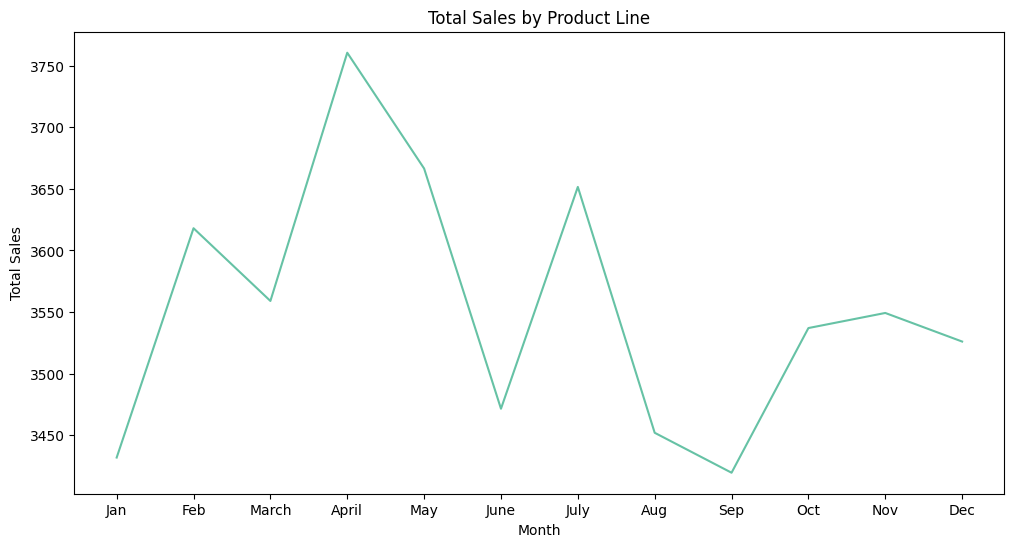

In [148]:
plt.figure(figsize=(12,6))
sns.lineplot(y="SALES", x="MONTH_ID", data=avg_monthly_sales, color="#66c2a5")

plt.title("Total Sales by Product Line")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

### Insight: Average Monthly Sales Trend (Combined for 3 Years)

The monthly sales trend averaged across 2003–2005 shows clear seasonal behavior:

- **Sales grow steadily from March to May**, peaking between **April and May**.
- A **decline begins in June**, with a **sharp drop in August and September**.
- These two months (Aug–Sep) mark the **lowest average sales** period.
- From September onward, **sales recover and stabilize**, maintaining strength till December.

**Business Implication:**  
- Mid-year dips could signal vacation/off-season periods or lower demand cycles.
- Peaks in April–May and Oct–Dec suggest strong windows for **campaigns, product launches, or bulk deals**.


**Top Customers**

In [149]:
top_cust=df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values(by='SALES', ascending= False).head(10)
print(top_cust)

                    CUSTOMERNAME      SALES
33         Euro Shopping Channel  912294.11
55  Mini Gifts Distributors Ltd.  654858.06
6     Australian Collectors, Co.  200995.41
58            Muscle Machine Inc  197736.94
44             La Rochelle Gifts  180124.90
31       Dragon Souveniers, Ltd.  172989.68
45             Land of Toys Inc.  164069.44
81     The Sharp Gifts Warehouse  160010.27
0                 AV Stores, Co.  157807.81
3        Anna's Decorations, Ltd  153996.13


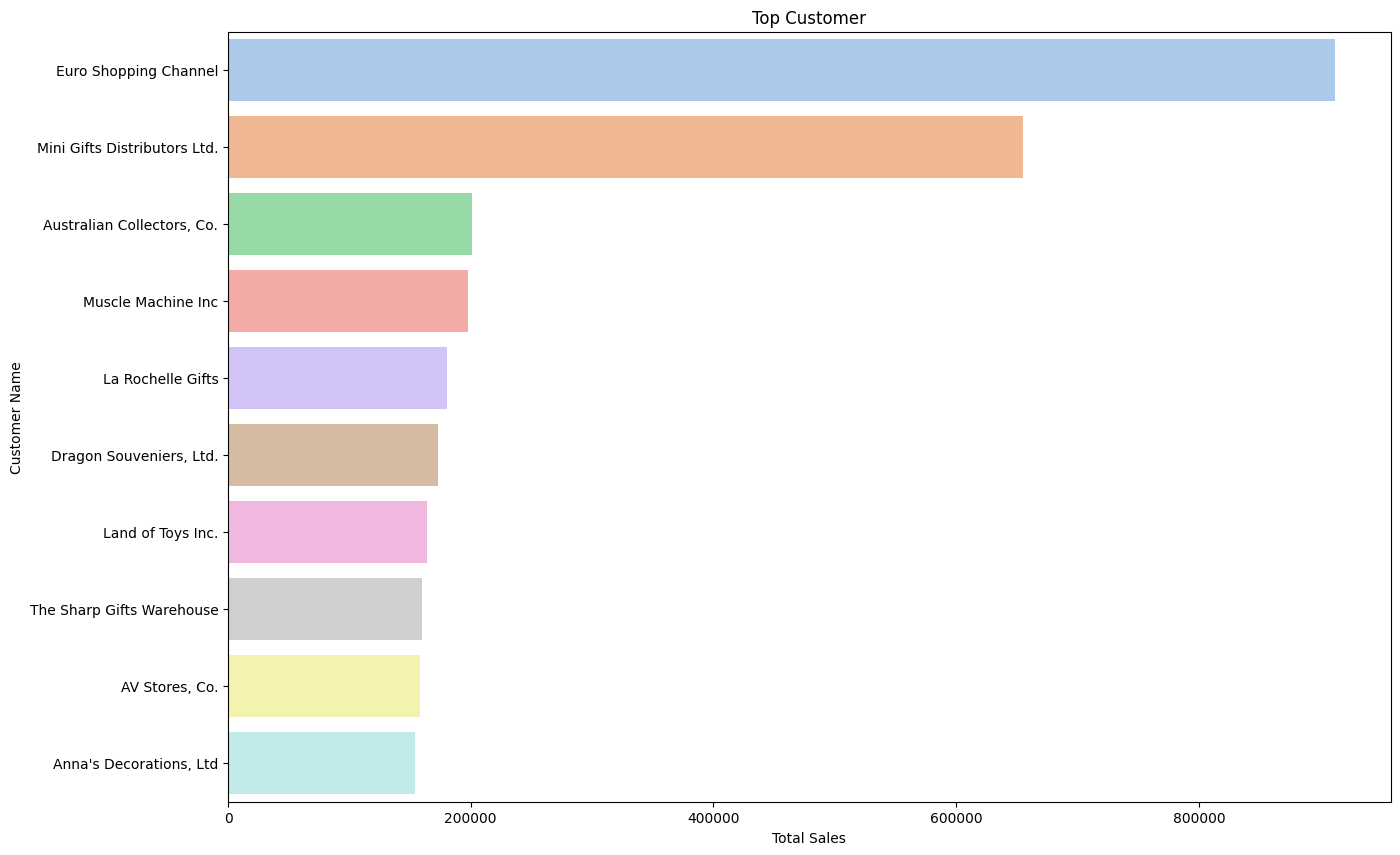

In [150]:
plt.figure(figsize=(15,10))
sns.barplot(y="CUSTOMERNAME", x="SALES", data=top_cust.sort_values(by="SALES", ascending=False), palette="pastel")
plt.title("Top Customer")
plt.ylabel("Customer Name")
plt.xlabel("Total Sales")
plt.show()

#Top Customers by Sales

- The **Euro Shopping Channel leads** the pack with total sales of approximately **912,294 dollars**,making them our highest contributor.
- Following closely is **Mini Gifts Distributors Ltd. with sales around $654,858**.
- Other key customers like Australian Collectors, Co. and Muscle Machine Inc also show significant sales, contributing strongly to our overall revenue.
- This breakdown highlights the importance of nurturing relationships with these top clients, as they have a substantial impact on our business performance.


In summary: Focusing on these top customers can help sustain and grow sales further.

**TOP COUNTRIES**

In [151]:
top_country=df.groupby('COUNTRY')['SALES'].sum().reset_index().sort_values(by='SALES', ascending= False).head(10)
print(top_country)

      COUNTRY       SALES
18        USA  3627982.83
14      Spain  1215686.92
6      France  1110916.52
0   Australia   630623.10
17         UK   478880.46
9       Italy   374674.31
5     Finland   329581.91
11     Norway   307463.70
13  Singapore   288488.41
4     Denmark   245637.15


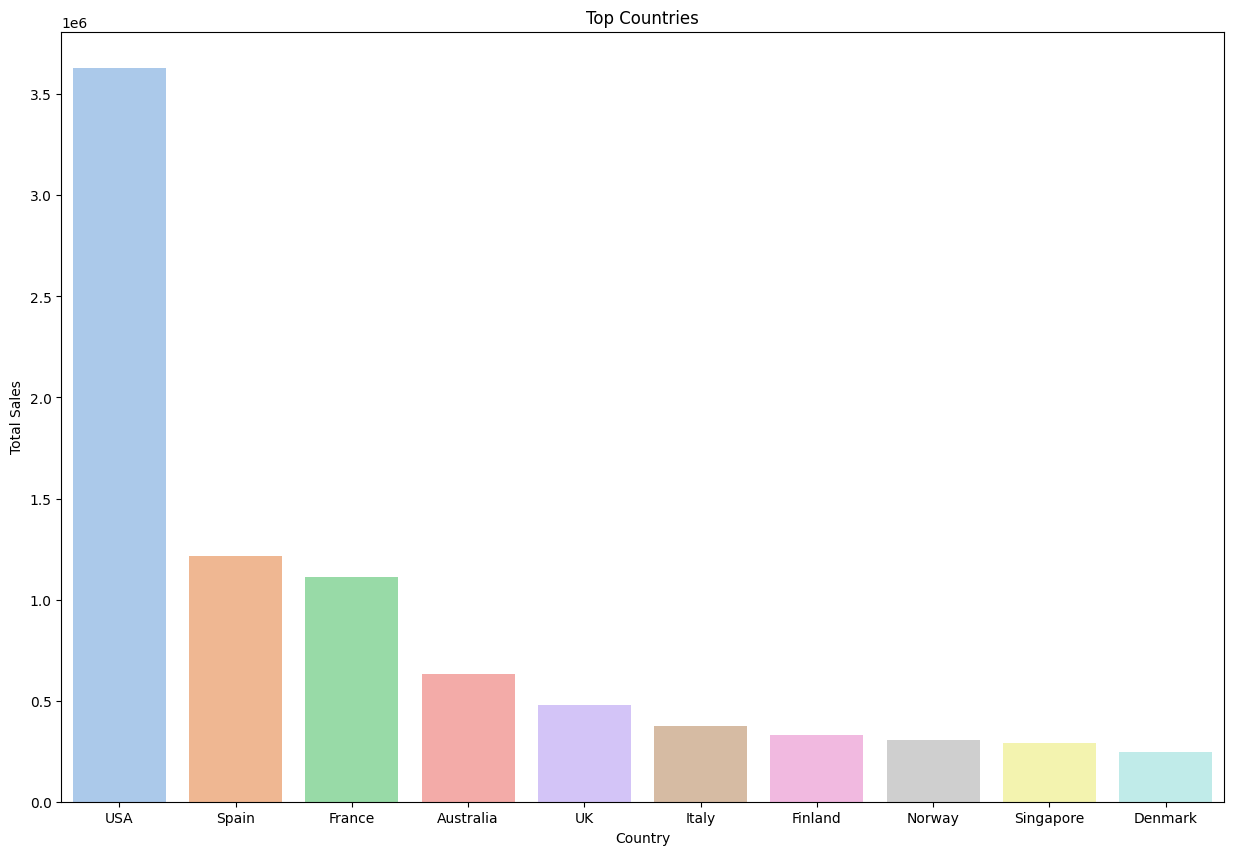

In [152]:
plt.figure(figsize=(15,10))
sns.barplot(y="SALES", x="COUNTRY", data=top_country.sort_values(by="SALES", ascending=False), palette="pastel")
plt.title("Top Countries")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.show()

# Top Countries by Sales

- The **United States leads significantly** with total sales of approximately **$3.63 million**, making it our largest market by far.

- **Spain and France follow as strong contributors**, with sales exceeding **1.2 million and 1.1 million respectively.**

- Other important markets include **Australia, the UK, and Italy, each contributing hundreds of thousands in sales.**

- This distribution highlights where our core customers are located and suggests potential areas to focus marketing and sales efforts for continued growth.

Prioritizing these key countries can help maximize revenue and expand market share effectively.

**TOP CITIES**

In [153]:
top_cities=df.groupby('CITY')['SALES'].sum().reset_index().sort_values(by='SALES', ascending= False).head(10)
print(top_cities)

             CITY       SALES
34         Madrid  1082551.44
61     San Rafael   654858.06
42            NYC   560787.77
63      Singapore   288488.41
52          Paris   268944.68
59  San Francisco   224358.68
45    New Bedford   207874.86
43         Nantes   204304.86
38      Melbourne   200995.41
7      Brickhaven   165255.20


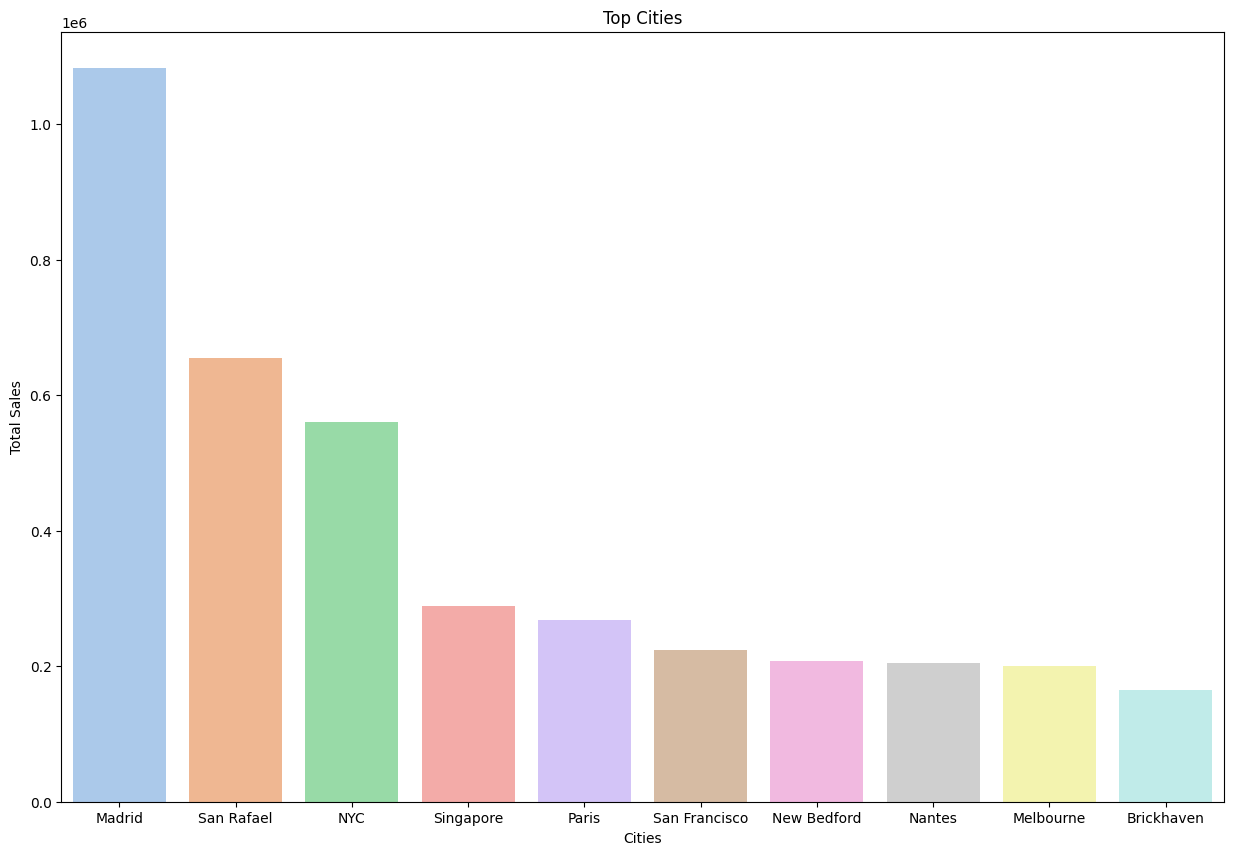

In [154]:
plt.figure(figsize=(15,10))
sns.barplot(y="SALES", x="CITY", data=top_cities.sort_values(by="SALES", ascending=False), palette="pastel")
plt.title("Top Cities")
plt.ylabel("Total Sales")
plt.xlabel("Cities")
plt.show()

# Top Cities by Sales

- **Madrid stands out** as the top-performing city, generating over **$1.08 million** in sales.

- **San Rafael and New York City follow** as key contributors, with sales of approximately 655k and 561k respectively.

- Other cities like **Singapore, Paris, and San Francisco also show strong sales** figures, each contributing significantly to overall revenue.

- These results highlight key urban markets that drive our sales performance and may benefit from focused sales strategies and targeted marketing campaigns.

Summary: Concentrating efforts on these high-performing cities could boost revenue growth and deepen market penetration.

**SALES BY DELASIZE**

In [155]:
sales_by_dealsize= df.groupby('DEALSIZE')['SALES'].sum().reset_index()
print(sales_by_dealsize)

  DEALSIZE       SALES
0    Large  1302119.26
1   Medium  6087432.24
2    Small  2643077.35


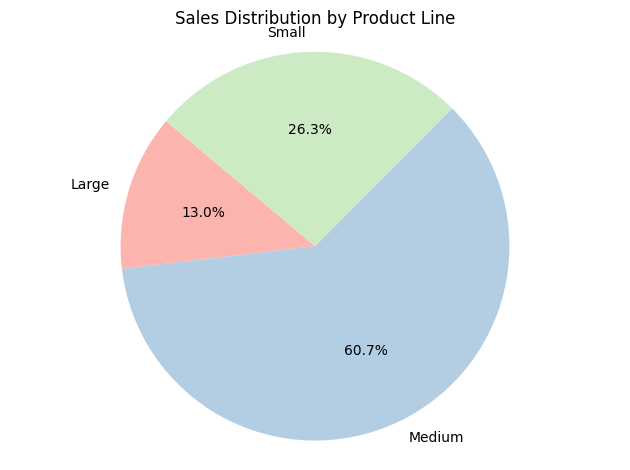

In [156]:
plt.pie(
    sales_by_dealsize["SALES"],
    labels=sales_by_dealsize["DEALSIZE"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors  
)

plt.title("Sales Distribution by Product Line")
plt.axis('equal')  
plt.tight_layout()
plt.show()

# Sales by Deal Size

- **Medium-sized deals contribute the largest share** of sales, totaling over **$6 million**, indicating that mid-level transactions are the main revenue driver.

- **Small deals** also make a significant impact with sales exceeding **$2.6 million**.

- **Large deals**, while fewer in number, generate over **$1.3 million** in sales, showing their importance in overall business.

Insight: Focusing on strategies that support and grow medium and small deal segments could maximize revenue, while also nurturing large deals for high-value opportunities.

**COMPARISION BETWEEN 2003-5**

In [157]:
monthly_trends_2003 = df[df['YEAR_ID']==2003].groupby('MONTH_ID')['SALES'].sum().reset_index()
monthly_trends_2004=df[df['YEAR_ID']==2004].groupby('MONTH_ID')['SALES'].sum().reset_index()
monthly_trends_2005=df[df['YEAR_ID']==2005].groupby('MONTH_ID')['SALES'].sum().reset_index()

/tmp/ipykernel_36/555588110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends_2003 = df[df['YEAR_ID']==2003].groupby('MONTH_ID')['SALES'].sum().reset_index()
/tmp/ipykernel_36/555588110.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends_2004=df[df['YEAR_ID']==2004].groupby('MONTH_ID')['SALES'].sum().reset_index()
/tmp/ipykernel_36/555588110.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

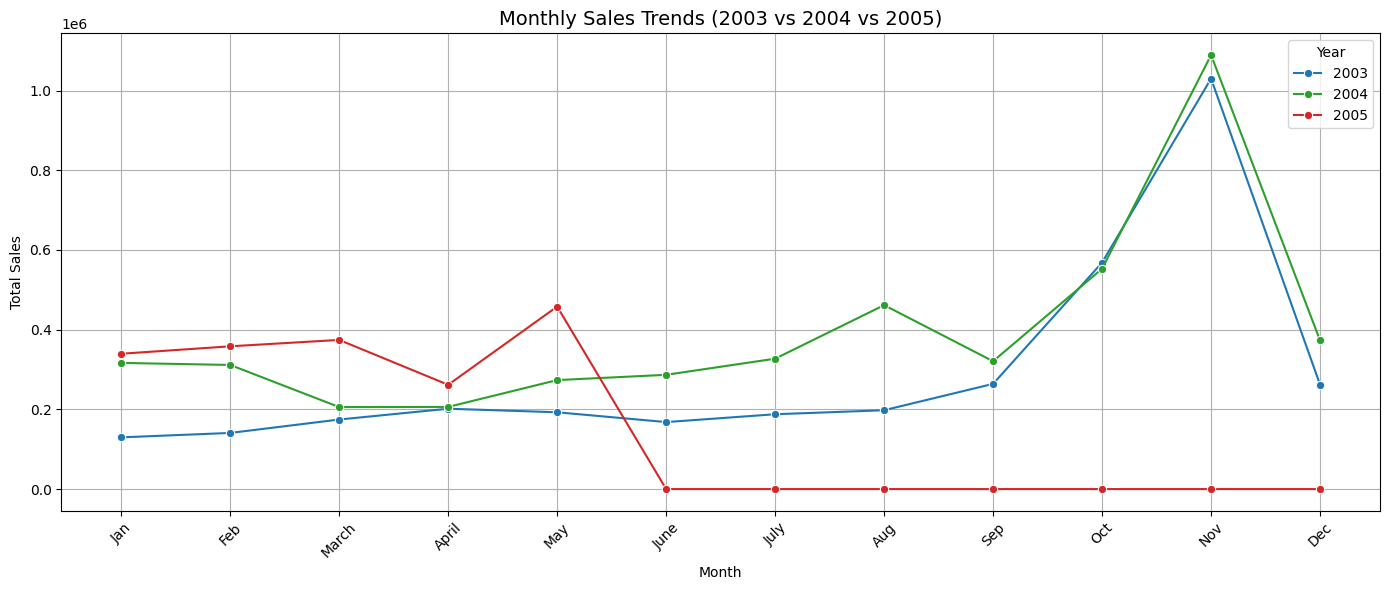

In [158]:
plt.figure(figsize=(14, 6))

sns.lineplot(data=monthly_trends_2003, x='MONTH_ID', y='SALES', label='2003', marker='o', color="#1f77b4")
sns.lineplot(data=monthly_trends_2004, x='MONTH_ID', y='SALES', label='2004', marker='o', color="#2ca02c")
sns.lineplot(data=monthly_trends_2005, x='MONTH_ID', y='SALES', label='2005', marker='o', color="#d62728")
plt.title("Monthly Sales Trends (2003 vs 2004 vs 2005)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Year")
plt.show()

# Monthly Sales Trends Comparison (2003-2005)

- **2005 shows strong performance up to June**, outperforming both 2003 and 2004 during the first half of the year. However, **data for July onward is missing**, so the overall yearly trend is incomplete.

- Between 2003 and 2004, the trend reverses after June:

- Up to June, 2003 outperforms 2004.

- **From July to December**, **2004 consistently shows higher sales than 2003**, indicating better second-half performance.

- **All three years exhibit a clear peak in sales between September and December**, highlighting this period as crucial for driving annual revenue.

- The incomplete 2005 data limits full-year comparison, but the early-year strength suggests potential for a strong overall year if the trend continued.

Insight: The sales pattern reveals the importance of the latter half of the year, for maximizing revenue. Strategies to boost sales during these months could significantly impact yearly targets. Also, monitoring data completeness is critical for accurate trend analysis.

**2003**

In [159]:

print(monthly_trends_2003)


   MONTH_ID       SALES
0       Jan   129753.60
1       Feb   140836.19
2     March   174504.90
3     April   201609.55
4       May   192673.11
5      June   168082.56
6      July   187731.88
7       Aug   197809.30
8       Sep   263973.36
9       Oct   568290.97
10      Nov  1029837.66
11      Dec   261876.46


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Monthly sales 2003')

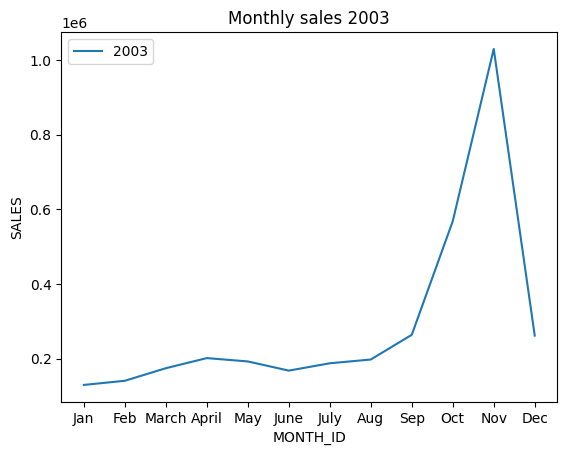

In [160]:
sns.lineplot(x="MONTH_ID", y="SALES", data=monthly_trends_2003, label="2003")
plt.title("Monthly sales 2003")

**2004**

In [161]:
print(monthly_trends_2004)

   MONTH_ID       SALES
0       Jan   316577.42
1       Feb   311419.53
2     March   205733.73
3     April   206148.12
4       May   273438.39
5      June   286674.22
6      July   327144.09
7       Aug   461501.27
8       Sep   320750.91
9       Oct   552924.25
10      Nov  1089048.01
11      Dec   372802.66


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Monthly sales 2003')

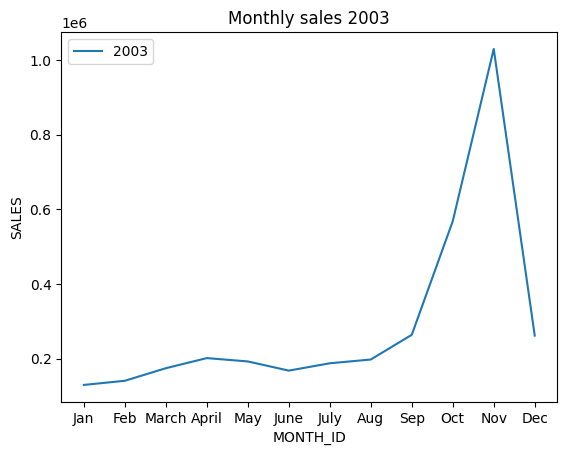

In [162]:
sns.lineplot(x="MONTH_ID", y="SALES", data=monthly_trends_2003, label="2003")
plt.title("Monthly sales 2003")

**2005**

In [163]:

print(monthly_trends_2005)

   MONTH_ID      SALES
0       Jan  339543.42
1       Feb  358186.18
2     March  374262.76
3     April  261633.29
4       May  457861.06
5      June       0.00
6      July       0.00
7       Aug       0.00
8       Sep       0.00
9       Oct       0.00
10      Nov       0.00
11      Dec       0.00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Monthly sales 2005')

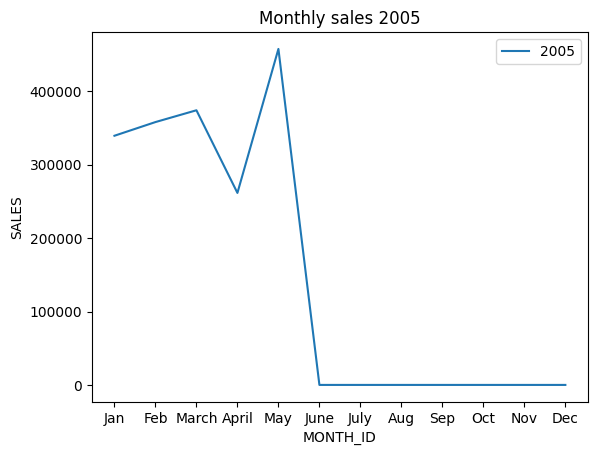

In [164]:
sns.lineplot(x="MONTH_ID", y="SALES", data=monthly_trends_2005, label="2005")
plt.title("Monthly sales 2005")

/tmp/ipykernel_36/3826151205.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='MONTH_ID', columns='DEALSIZE', values='SALES', aggfunc='sum')


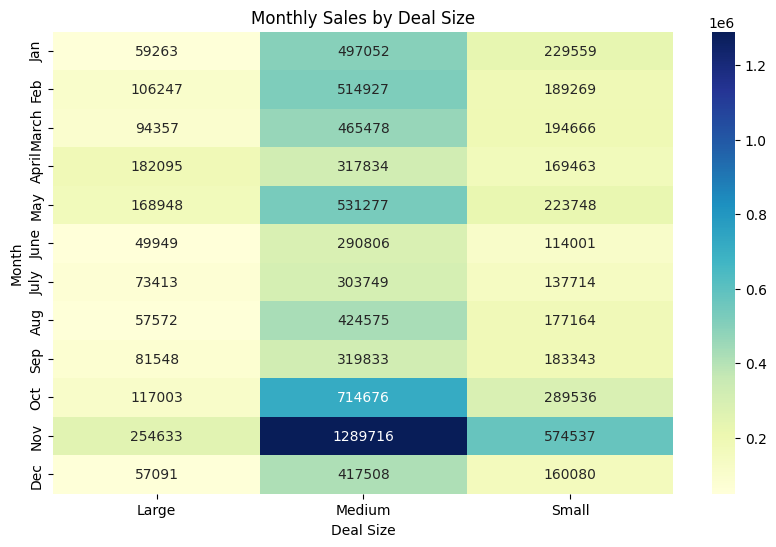

In [165]:
# Sales per deal size over months (like a pivot chart)
pivot = df.pivot_table(index='MONTH_ID', columns='DEALSIZE', values='SALES', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Sales by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Month")
plt.show()


### Monthly Sales Heatmap by Deal Size

This heatmap visualizes the total sales volume across different deal sizes and months.  
Key Observations:

- **Large deals** dominate in **Oct–Dec** with peak sales.
- **Medium deals** show **consistent** sales across the year.
- **Small deals** contribute the **least** but show spikes in mid-year.

This visualization helps identify seasonality based on deal size useful for pricing, forecasting, and sales strategy.


### Final Summary

- The **USA, Madrid, and Medium-sized deals** are the top contributors to sales.
- **Sales peak** in (**Sept–Dec**) consistently across all years.
- 2005 showed the strongest performance in the first half, even with missing data beyond June.
- **Top customers** like **Euro Shopping Channel and Mini Gifts Distributors** are critical revenue drivers.

This analysis helps identify high-performing segments, seasonal trends, and strategic focus areas for business growth.
